# Projeto "Análise Pokémon" 2

**Descrição**: este projeto tem como objetivo praticar análise descritiva de dados com as bibliotecas "pandas" e "numpy".

XPTO

A seguir, faremos a análise da coluna "**against_fire**" do Dataframe da segunda geração.

Esta coluna representa o nível de fraqueza do Pokémon contra ataques do tipo fogo.

Quanto maior o número, maior a fraqueza:
- 0.25: muito resistente contra fogo
- 0.5: resistente contra fogo
- 1.0: irrelevante
- 2.0: fraco contra fogo
- 4.0: muito fraco contra fogo

Algumas perguntas levantadas:
- XPTO



<img src="banner.jpg" style="height:200px">

## 1. Importações

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (10,5))

## 2. Coleta de dados

Trabalharemos com um Dataset contendo os 100 Pokémons da 2ª geração do universo Pokémon.

In [242]:
df_pkmn = pd.read_csv("dados/pokemon.csv", sep = ";")

In [243]:
df_pkmn.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
0,Chikorita,grass,none,45,49,65,49,65,45,2,...,318,45,Leaf Pokémon,1059860,0.9,Chicoritaチコリータ,88.1,152,6.4,0
1,Bayleef,grass,none,60,62,80,63,80,60,2,...,405,45,Leaf Pokémon,1059860,1.2,Bayleafベイリーフ,88.1,153,15.8,0
2,Meganium,grass,none,80,82,100,83,100,80,2,...,525,45,Herb Pokémon,1059860,1.8,Meganiumメガニウム,88.1,154,100.5,0
3,Cyndaquil,fire,none,39,52,43,60,50,65,2,...,309,45,Fire Mouse Pokémon,1059860,0.5,Hinoarashiヒノアラシ,88.1,155,7.9,0
4,Quilava,fire,none,58,64,58,80,65,80,2,...,405,45,Volcano Pokémon,1059860,0.9,Magmarashiマグマラシ,88.1,156,19.0,0


## 3. Exploração de dados

### 3.1 Tipos de Pokémon da segunda geração

In [244]:
# dataframe para as colunas type1 e type2
df_pkmn_gen2_type1 = pd.DataFrame(df_pkmn.type1.value_counts(), columns=['type1'])
df_pkmn_gen2_type2 = pd.DataFrame(df_pkmn.type2.value_counts(), columns=['type2'])
# tratando dados (removendo linha 'none')
df_pkmn_gen2_type2.drop(['none'], inplace = True)
# concatenando os dois dataframes
df_pkmn_gen2_both_types = pd.concat([df_pkmn_gen2_type1, df_pkmn_gen2_type2], sort=False, axis = 1)
# tratando dados (preenchendo dados NaN com 0)
df_pkmn_gen2_both_types = df_pkmn_gen2_both_types.fillna({'type1': 0,'type2': 0})
# criando coluna de soma
df_pkmn_gen2_both_types['sum'] = df_pkmn_gen2_both_types['type1'] + df_pkmn_gen2_both_types['type2']

In [245]:
df_pkmn_gen2_both_types

,type1,type2,sum
water,18.0,0.0,18.0
normal,15.0,0.0,15.0
bug,10.0,0.0,10.0
grass,9.0,1.0,10.0
fire,8.0,2.0,10.0
psychic,7.0,3.0,10.0
electric,6.0,2.0,8.0
fairy,5.0,3.0,8.0
dark,5.0,1.0,6.0
rock,4.0,3.0,7.0


#### 3.1.2 Representação em gráficos

In [246]:
# função
def criar_grafico_tipos(dataframe, cores, cor_borda, eixo_y, titulo):
    dataframe.plot(kind='bar', color=cores, ec=cor_borda, y=eixo_y)
    plt.title(titulo)
    plt.ylabel('Quantidade de Pokémons')
    plt.xlabel('Tipos')
    plt.show()

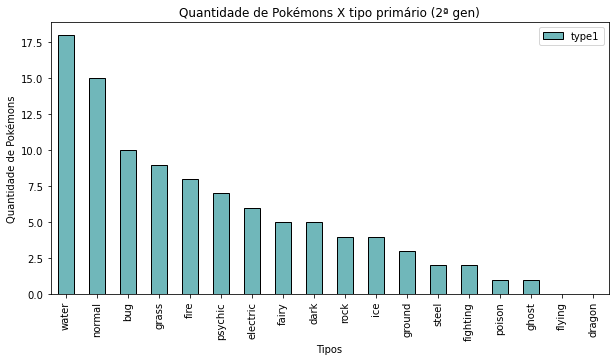

In [247]:
criar_grafico_tipos(df_pkmn_gen2_both_types, '#70B7BA', 'black', 'type1', "Quantidade de Pokémons X tipo primário (2ª gen)")

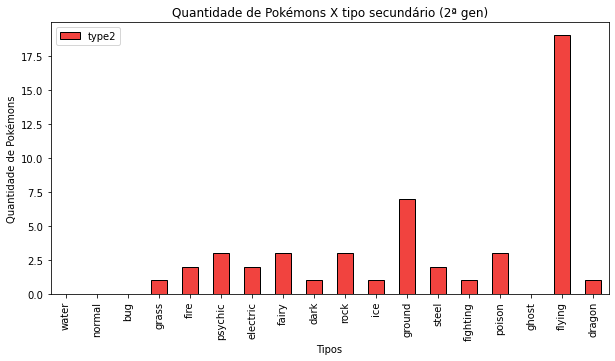

In [248]:
criar_grafico_tipos(df_pkmn_gen2_both_types, '#F1433F', 'black', 'type2', "Quantidade de Pokémons X tipo secundário (2ª gen)")

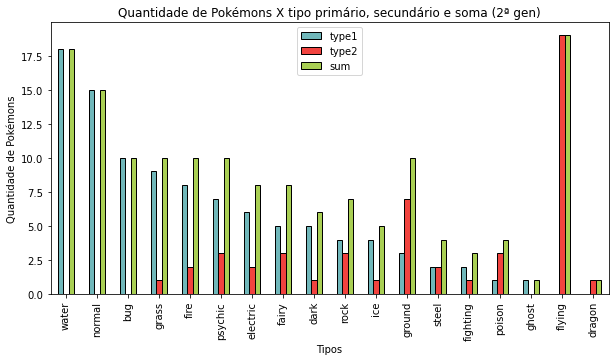

In [249]:
criar_grafico_tipos(df_pkmn_gen2_both_types, ['#70B7BA', '#F1433F', '#A9CF54'], 'black', ['type1','type2', 'sum'], "Quantidade de Pokémons X tipo primário, secundário e soma (2ª gen)")

### 3.2 Análise de Pokémons por tipo

Funções:

In [250]:
# função para criar dataframe com somente pkmns de certo tipo
def criar_df_pkmn_tipo(dataframe, tipo):
    selecao = dataframe['type1'] == tipo
    dataframe_type1 = dataframe[selecao]
    dataframe_type1
    selecao = dataframe['type2'] == tipo
    dataframe_type2 = dataframe[selecao]
    dataframe_type2
    dataframe_type = pd.concat([dataframe_type1, dataframe_type2], sort=False)
    return dataframe_type

In [358]:
# função para representar características de batalha dos pkmns em gráfico
def criar_grafico_pkmn_tipo(dataframe, cores, cor_borda, titulo):
    grafico = dataframe.plot(kind='bar', color = cores, ec=cor_borda, x='name',y=['hp', 'attack', 'defense', 'speed'])
    grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, horizontalalignment='right') # deixar nomes eixo x de lado 
    plt.title(titulo)
    plt.ylabel('Pontos')
    plt.xlabel('Pokémons')
    plt.ylim(0,200)

    plt.show()

In [322]:
# função para criar "series" que agrupa pkmns em função do nível de fraqueza contra certo tipo
def criar_series_fraquezas(dataframe, tipo):
    series = pd.Series(dataframe[tipo].value_counts())
    series.sort_index(ascending=True, inplace=True)
    return series

In [323]:
# função para criar "series" que agrupa pkmns em função do nível de fraqueza contra certo tipo (dividido em 3 faixas)
def criar_series_fraquezas_com_faixas(dataframe, tipo):
    faixas = [0, 0.5, 1.5, 5]
    labels = ['Resistentes', 'Indiferente', 'Fracos']
    recorte_against_fire = pd.cut(dataframe[tipo], faixas, include_lowest=True, labels=labels)
    series = recorte_against_fire.value_counts()
    series.sort_index(ascending=True, inplace=True)
    return series

In [324]:
# função para representar "series" de nível de fraqueza em gráfico
def criar_grafico_series_fraquezas(series, cores, titulo):
    series.plot(kind='bar', color = cores, ec='black')
    plt.title(titulo)
    plt.ylabel('Quantidade de Pokémons')
    plt.xlabel('Nível de fraqueza contra o tipo')
    plt.show()
    

In [325]:
# função para representar "series" de nível de fraqueza em gráfico de pizza
def criar_grafico_pizza_series_fraquezas(series, cores, titulo):
    series.plot(kind='pie', autopct = "%.2f%%", colors=cores, figsize=(10, 6))
    plt.title(titulo)
    plt.show()

#### 3.2.X Pokémons do tipo XXXXXX

In [326]:
# df_pkmn_gen2_{xxxx} = criar_df_pkmn_tipo(df_pkmn, '{xxxx}')
# df_pkmn_gen2_{xxxx}.head()

In [327]:
# criar_grafico_pkmn_tipo(df_pkmn_gen2_{xxxx}, ['darkblue', 'blue', 'lightgray', 'lightblue'], 'black', "Características de batalha dos Pokémons tipo {xxxx}")

In [328]:
# series_fraqueza_{xxxx} = criar_series_fraquezas(df_pkmn, 'against_{xxxx}')
# criar_grafico_series_fraquezas(series_fraqueza_{xxxx}, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra {xxxx}")

In [329]:
# series_fraqueza_{xxxx}_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_{xxxx}")
# criar_grafico_pizza_series_fraquezas(series_fraqueza_{xxxx}_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra {xxxx}")

## 1 Pokémons do tipo água 💧

In [330]:
df_pkmn_gen2_water = criar_df_pkmn_tipo(df_pkmn, 'water')
df_pkmn_gen2_water.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
6,Totodile,water,none,50,65,64,44,48,43,2,...,314,45,Big Jaw Pokémon,1059860,0.6,Waninokoワニノコ,88.1,158,9.5,0
7,Croconaw,water,none,65,80,80,59,63,58,2,...,405,45,Big Jaw Pokémon,1059860,1.1,Alligatesアリゲイツ,88.1,159,25.0,0
8,Feraligatr,water,none,85,105,100,79,83,78,2,...,530,45,Big Jaw Pokémon,1059860,2.3,Ordileオーダイル,88.1,160,88.8,0
18,Chinchou,water,electric,75,38,38,56,56,67,2,...,330,190,Angler Pokémon,1250000,0.5,Chonchieチョンチー,50.0,170,12.0,0
19,Lanturn,water,electric,125,58,58,76,76,67,2,...,460,75,Light Pokémon,1250000,1.2,Lanternランターン,50.0,171,22.5,0


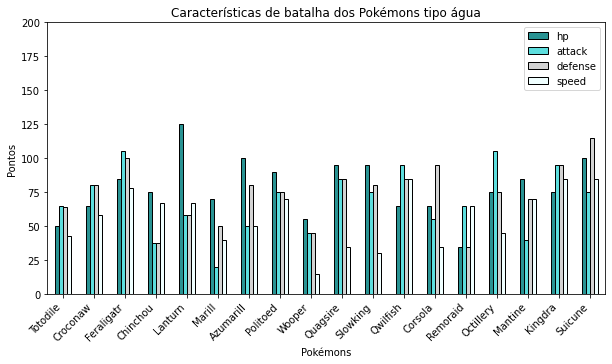

In [331]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_water, ['#299393', '#5DDEDE', 'lightgray', '#F0FFFF'], 'black', "Características de batalha dos Pokémons tipo água")

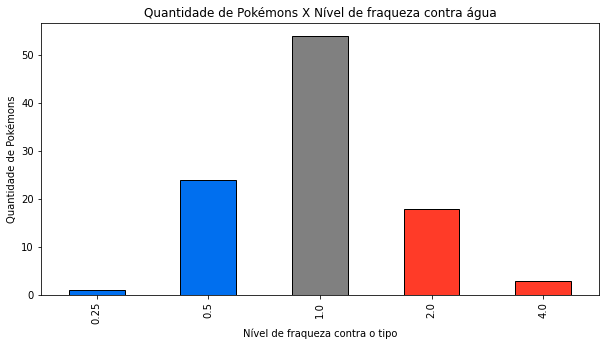

In [332]:
series_fraqueza_water = criar_series_fraquezas(df_pkmn, 'against_water')
criar_grafico_series_fraquezas(series_fraqueza_water, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra água")

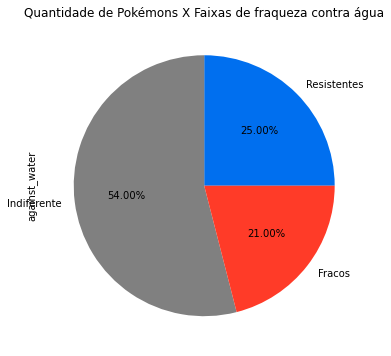

In [333]:
series_fraqueza_water_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_water")
criar_grafico_pizza_series_fraquezas(series_fraqueza_water_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra água")

## 2 Pokémons do tipo normal 🐨

In [334]:
df_pkmn_gen2_normal = criar_df_pkmn_tipo(df_pkmn, 'normal')
df_pkmn_gen2_normal.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
9,Sentret,normal,none,35,46,34,35,45,20,2,...,215,255,Scout Pokémon,1000000,0.8,Otachiオタチ,50.0,161,6.0,0
10,Furret,normal,none,85,76,64,45,55,90,2,...,415,90,Long Body Pokémon,1000000,1.8,Ootachiオオタチ,50.0,162,32.5,0
11,Hoothoot,normal,flying,60,30,30,36,56,50,2,...,262,255,Owl Pokémon,1000000,0.7,Hohoホーホー,50.0,163,21.2,0
12,Noctowl,normal,flying,100,50,50,86,96,70,2,...,452,90,Owl Pokémon,1000000,1.6,Yorunozukuヨルノズク,50.0,164,40.8,0
22,Igglybuff,normal,fairy,90,30,15,40,20,15,2,...,210,170,Balloon Pokémon,800000,0.3,Pupurinププリン,24.6,174,1.0,0


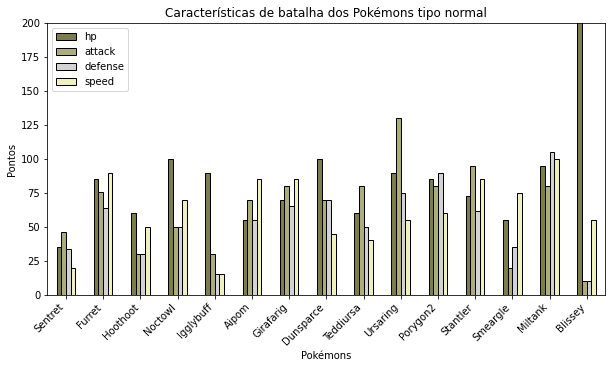

In [335]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_normal, ['#7C7C4C', '#ADAD7C', 'lightgray', '#F0F0BF'], 'black', "Características de batalha dos Pokémons tipo normal")

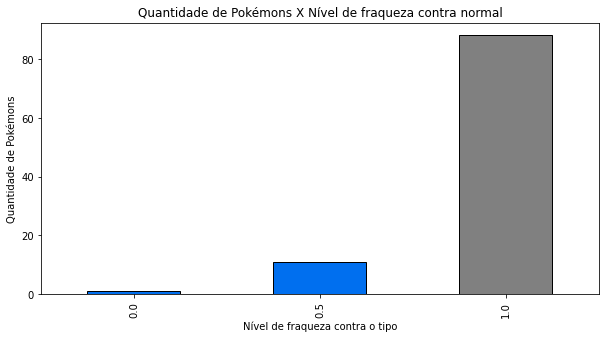

In [336]:
series_fraqueza_normal = criar_series_fraquezas(df_pkmn, 'against_normal')
criar_grafico_series_fraquezas(series_fraqueza_normal, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra normal")

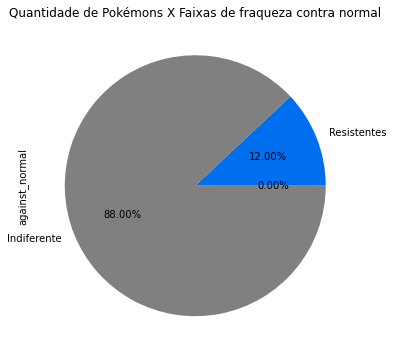

In [337]:
series_fraqueza_normal_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_normal")
criar_grafico_pizza_series_fraquezas(series_fraqueza_normal_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra normal")

## 3 Pokémons do tipo inseto 🐝

In [338]:
df_pkmn_gen2_bug = criar_df_pkmn_tipo(df_pkmn, 'bug')
df_pkmn_gen2_bug.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
13,Ledyba,bug,flying,40,20,30,40,80,55,2,...,265,255,Five Star Pokémon,800000,1.0,Redibaレディバ,50.0,165,10.8,0
14,Ledian,bug,flying,55,35,50,55,110,85,2,...,390,90,Five Star Pokémon,800000,1.4,Redianレディアン,50.0,166,35.6,0
15,Spinarak,bug,poison,40,60,40,40,40,30,2,...,250,255,String Spit Pokémon,800000,0.5,Itomaruイトマル,50.0,167,8.5,0
16,Ariados,bug,poison,70,90,70,60,70,40,2,...,400,90,Long Leg Pokémon,800000,1.1,Ariadosアリアドス,50.0,168,33.5,0
41,Yanma,bug,flying,65,65,45,75,45,95,2,...,390,75,Clear Wing Pokémon,1000000,1.2,Yanyanmaヤンヤンマ,50.0,193,38.0,0


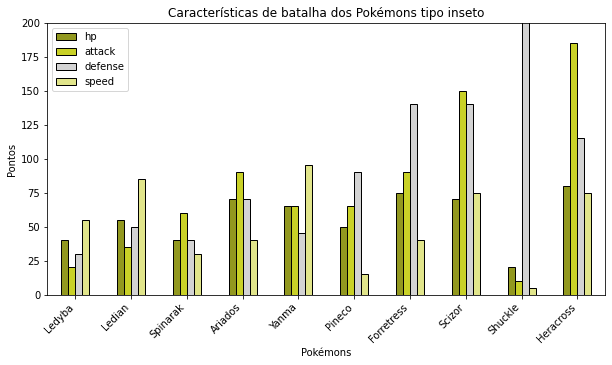

In [339]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_bug, ['#92981F', '#C9D127', 'lightgray', '#E1E58B'], 'black', "Características de batalha dos Pokémons tipo inseto")

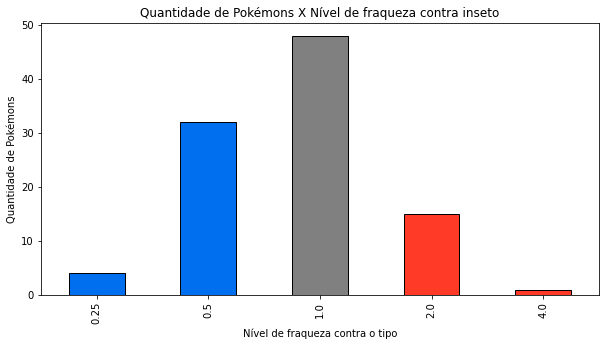

In [340]:
series_fraqueza_bug = criar_series_fraquezas(df_pkmn, 'against_bug')
criar_grafico_series_fraquezas(series_fraqueza_bug, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra inseto")

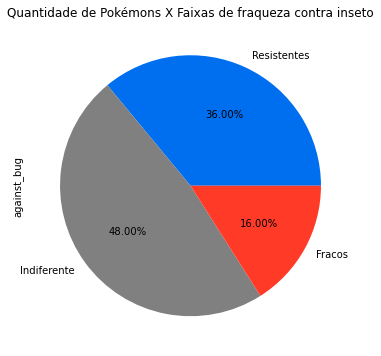

In [341]:
series_fraqueza_bug_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_bug")
criar_grafico_pizza_series_fraquezas(series_fraqueza_bug_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra inseto")

## 4 Pokémons do tipo planta 🌱

In [342]:
df_pkmn_gen2_grass = criar_df_pkmn_tipo(df_pkmn, 'grass')
df_pkmn_gen2_grass.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
0,Chikorita,grass,none,45,49,65,49,65,45,2,...,318,45,Leaf Pokémon,1059860,0.9,Chicoritaチコリータ,88.1,152,6.4,0
1,Bayleef,grass,none,60,62,80,63,80,60,2,...,405,45,Leaf Pokémon,1059860,1.2,Bayleafベイリーフ,88.1,153,15.8,0
2,Meganium,grass,none,80,82,100,83,100,80,2,...,525,45,Herb Pokémon,1059860,1.8,Meganiumメガニウム,88.1,154,100.5,0
30,Bellossom,grass,none,75,80,95,90,100,50,2,...,490,45,Flower Pokémon,1059860,0.4,Kireihanaキレイハナ,50.0,182,5.8,0
35,Hoppip,grass,flying,35,35,40,35,55,50,2,...,250,255,Cottonweed Pokémon,1059860,0.4,Haneccoハネッコ,50.0,187,0.5,0


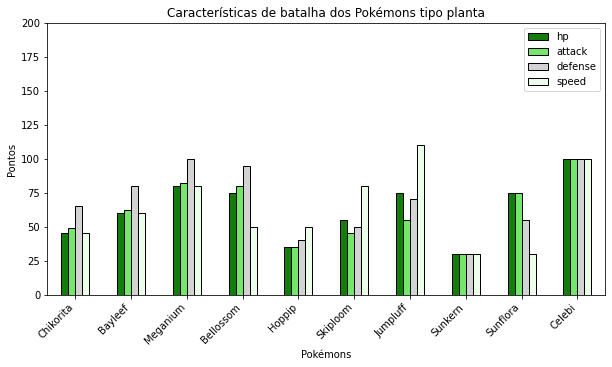

In [343]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_grass, ['#137D0B', '#74E76B', 'lightgray', '#ECFFEA'], 'black', "Características de batalha dos Pokémons tipo planta")

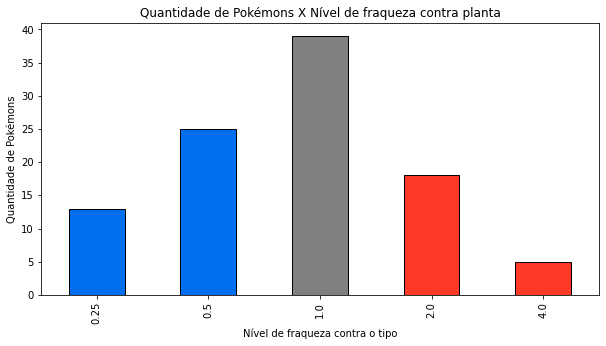

In [344]:
series_fraqueza_grass = criar_series_fraquezas(df_pkmn, 'against_grass')
criar_grafico_series_fraquezas(series_fraqueza_grass, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra planta")

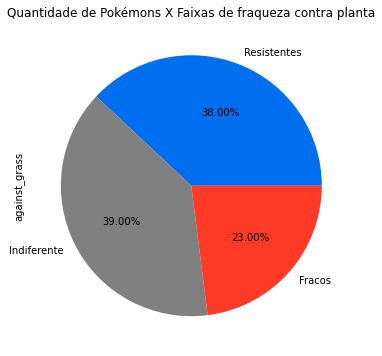

In [345]:
series_fraqueza_grass_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_grass")
criar_grafico_pizza_series_fraquezas(series_fraqueza_grass_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra planta")

## 5 Pokémons do tipo fogo 🔥

In [346]:
df_pkmn_gen2_fire = criar_df_pkmn_tipo(df_pkmn, 'fire')
df_pkmn_gen2_fire.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
3,Cyndaquil,fire,none,39,52,43,60,50,65,2,...,309,45,Fire Mouse Pokémon,1059860,0.5,Hinoarashiヒノアラシ,88.1,155,7.9,0
4,Quilava,fire,none,58,64,58,80,65,80,2,...,405,45,Volcano Pokémon,1059860,0.9,Magmarashiマグマラシ,88.1,156,19.0,0
5,Typhlosion,fire,none,78,84,78,109,85,100,2,...,534,45,Volcano Pokémon,1059860,1.7,Bakphoonバクフーン,88.1,157,79.5,0
66,Slugma,fire,none,40,40,40,70,40,20,2,...,250,190,Lava Pokémon,1000000,0.7,Magmagマグマッグ,50.0,218,35.0,0
67,Magcargo,fire,rock,60,50,120,90,80,30,2,...,430,75,Lava Pokémon,1000000,0.8,Magcargotマグカルゴ,50.0,219,55.0,0


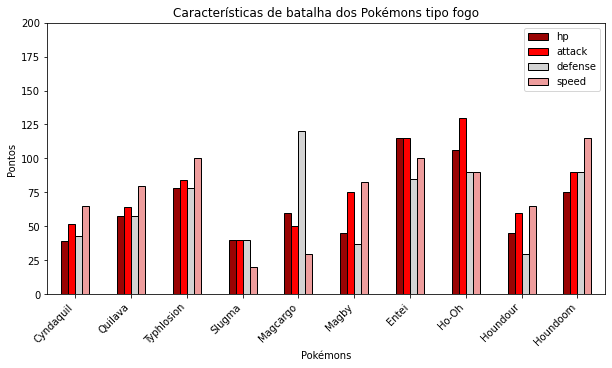

In [347]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_fire, ['#990303', '#FF0000', 'lightgray', '#EE9D9D'], 'black', "Características de batalha dos Pokémons tipo fogo")

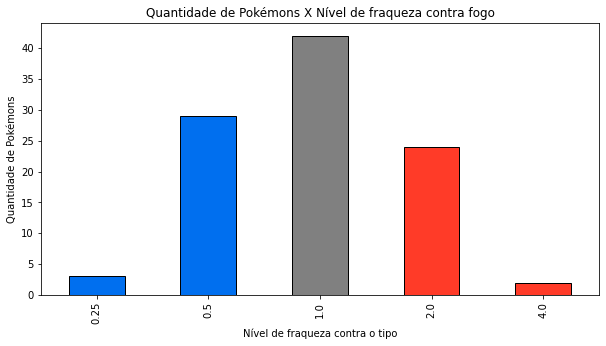

In [348]:
series_fraqueza_fire = criar_series_fraquezas(df_pkmn, 'against_fire')
criar_grafico_series_fraquezas(series_fraqueza_fire, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra fogo")

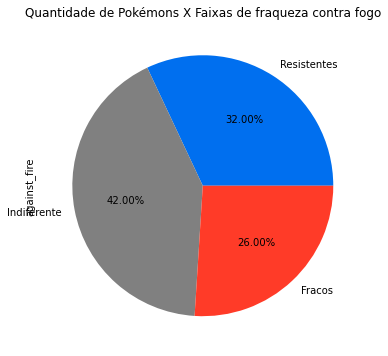

In [349]:
series_fraqueza_fire_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_fire")
criar_grafico_pizza_series_fraquezas(series_fraqueza_fire_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra fogo")

## 6 Pokémons do tipo psíquico 🧿

In [350]:
df_pkmn_gen2_psychic = criar_df_pkmn_tipo(df_pkmn, 'psychic')
df_pkmn_gen2_psychic.head()

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,base_total,capture_rate,classfication,experience_growth,height_m,japanese_name,percentage_male,pokedex_number,weight_kg,is_legendary
25,Natu,psychic,flying,40,50,45,70,45,70,2,...,320,190,Little Bird Pokémon,1000000,0.2,Natyネイティ,50.0,177,2.0,0
26,Xatu,psychic,flying,65,75,70,95,70,95,2,...,470,75,Mystic Pokémon,1000000,1.5,Natioネイティオ,50.0,178,15.0,0
44,Espeon,psychic,none,65,65,60,130,95,110,2,...,525,45,Sun Pokémon,1000000,0.9,Eifieエーフィ,88.1,196,26.5,0
49,Unown,psychic,none,48,72,48,72,48,48,2,...,336,225,Symbol Pokémon,1000000,0.5,Unknownアンノーン,NaN,201,5.0,0
50,Wobbuffet,psychic,none,190,33,58,33,58,33,2,...,405,45,Patient Pokémon,1000000,1.3,Sonansソーナンス,50.0,202,28.5,0


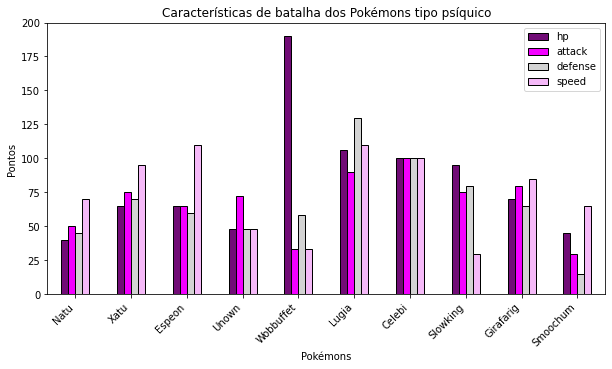

In [351]:
criar_grafico_pkmn_tipo(df_pkmn_gen2_psychic, ['#710C76', '#F300FF', 'lightgray', '#F5B9F8'], 'black', "Características de batalha dos Pokémons tipo psíquico")

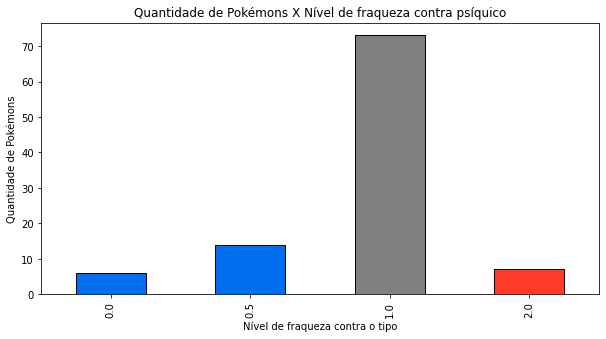

In [352]:
series_fraqueza_psychic = criar_series_fraquezas(df_pkmn, 'against_psychic')
criar_grafico_series_fraquezas(series_fraqueza_psychic, ['#006FEF', '#006FEF', 'gray', '#FF3B28', '#FF3B28'], "Quantidade de Pokémons X Nível de fraqueza contra psíquico")

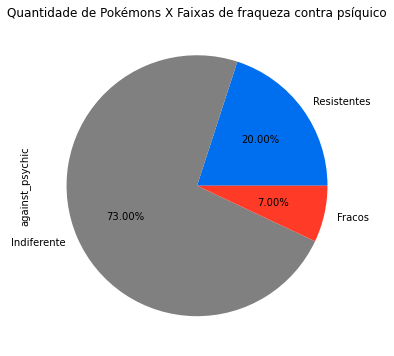

In [353]:
series_fraqueza_psychic_recorte = criar_series_fraquezas_com_faixas(df_pkmn, "against_psychic")
criar_grafico_pizza_series_fraquezas(series_fraqueza_psychic_recorte, ['#006FEF', 'gray','#FF3B28'], "Quantidade de Pokémons X Faixas de fraqueza contra psíquico")

<AxesSubplot:>

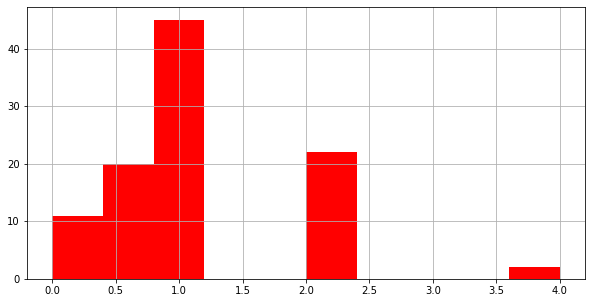

In [354]:
df_pkmn['against_fight'].hist(color=['red'])

In [355]:
import seaborn as sns

<AxesSubplot:xlabel='against_fire', ylabel='count'>

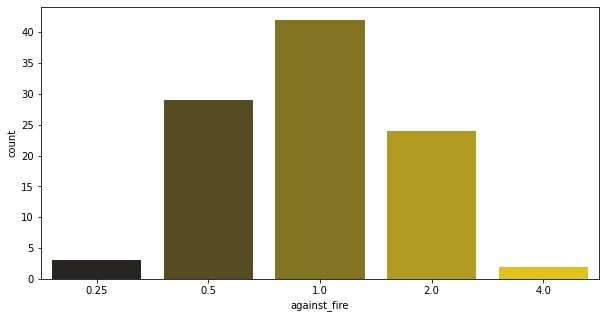

In [356]:
palette = sns.dark_palette("gold", 5, reverse=False)

series = df_pkmn['against_fire']
sns.countplot(x=series, palette=palette)

<AxesSubplot:xlabel='against_fire', ylabel='Count'>

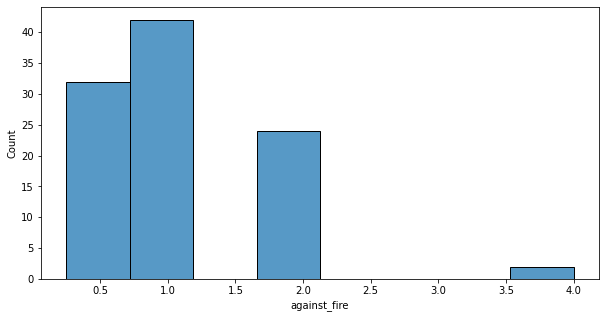

In [357]:
sns.histplot(df_pkmn['against_fire'])